In [1]:
#### BATTING
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
path=os.path.join("projectdata/batting.csv")
print(path)
from scipy.stats import linregress

projectdata/batting.csv


In [2]:
#reading
data_b = pd.read_csv("projectdata/batting.csv")
data_b.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
#cleanning to get from 1985-1995
new_data = data_b[(1985 < data_b['yearID']) & (data_b['yearID'] < 1995)]
new_data

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63253,aasedo01,1986,1,BAL,AL,66,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
63254,ackerji01,1986,1,TOR,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
63255,ackerji01,1986,2,ATL,NL,21,28,1,3,1,...,0.0,0.0,0.0,0,21.0,0.0,0.0,0.0,0.0,0.0
63256,adducji01,1986,1,ML4,AL,3,11,2,1,1,...,0.0,0.0,0.0,1,2.0,0.0,0.0,1.0,0.0,0.0
63257,agostju01,1986,1,CHA,AL,9,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72898,youngke01,1994,1,PIT,NL,59,122,15,25,7,...,11.0,0.0,2.0,8,34.0,2.0,1.0,2.0,1.0,3.0
72899,zambred01,1994,1,CHN,NL,67,116,17,30,7,...,18.0,2.0,1.0,16,29.0,0.0,1.0,0.0,0.0,3.0
72900,zeileto01,1994,1,SLN,NL,113,415,62,111,25,...,75.0,1.0,3.0,52,56.0,3.0,3.0,0.0,7.0,13.0
72901,zupcibo01,1994,1,BOS,AL,4,4,0,0,0,...,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#finding total number of teams 
total_teams=new_data['teamID'].nunique()
total_teams

28

In [5]:
#finding batting average

new_data[["playerID",
           "yearID",
           "teamID",
           "R",
           "H",
           "SO",
           "HR"]]

,playerID,yearID,teamID,R,H,SO,HR
63253,aasedo01,1986,BAL,0,0,0.0,0
63254,ackerji01,1986,TOR,0,0,0.0,0
63255,ackerji01,1986,ATL,1,3,21.0,0
63256,adducji01,1986,ML4,2,1,2.0,0
63257,agostju01,1986,CHA,0,0,0.0,0
...,...,...,...,...,...,...,...
72898,youngke01,1994,PIT,15,25,34.0,1
72899,zambred01,1994,CHN,17,30,29.0,6
72900,zeileto01,1994,SLN,62,111,56.0,19
72901,zupcibo01,1994,BOS,0,0,1.0,0


In [6]:
average_hit = new_data.groupby("teamID").H.mean()
average_run = new_data.groupby("teamID").R.mean()
average_homerun = new_data.groupby("teamID").HR.mean()
average_strikeouts = new_data.groupby("teamID").SO.mean()

final_averages_df = pd.DataFrame({"Hit" : (average_hit) ,
                            "Run" :(average_run),
                            "Strikeouts" :(average_strikeouts),
                              "Homerun" : (average_homerun)})
final_averages_df


,Hit,Run,Strikeouts,Homerun
teamID,,,,
ATL,33.607843,16.591036,22.509804,3.532213
BAL,33.410959,16.794521,21.849315,3.813699
BOS,37.255014,18.595989,20.312321,3.151862
CAL,33.600000,16.679452,22.112329,3.265753
CHA,35.000000,17.705056,21.564607,3.252809
CHN,36.923977,17.479532,23.678363,3.713450
CIN,34.098361,16.833333,22.863388,3.374317
CLE,32.494975,15.814070,19.603015,3.087940
COL,31.768293,16.231707,20.792683,3.256098


In [7]:
#final_averages_df.sort_values('Hit', ascending=False)
#replace any nan values  with 0
top_10_df = final_averages_df.sort_values('Hit', ascending=False).head(10)
top_10_df

,Hit,Run,Strikeouts,Homerun
teamID,,,,
MIN,37.823188,18.846377,21.057971,3.559420
BOS,37.255014,18.595989,20.312321,3.151862
TOR,37.037143,19.405714,23.354286,4.094286
CHN,36.923977,17.479532,23.678363,3.713450
ML4,36.767442,18.805233,22.505814,3.136628
SLN,35.571014,16.762319,22.544928,2.194203
DET,35.169492,19.556497,24.714689,4.474576
KCA,35.055866,16.916201,22.393855,2.916201
CHA,35.000000,17.705056,21.564607,3.252809


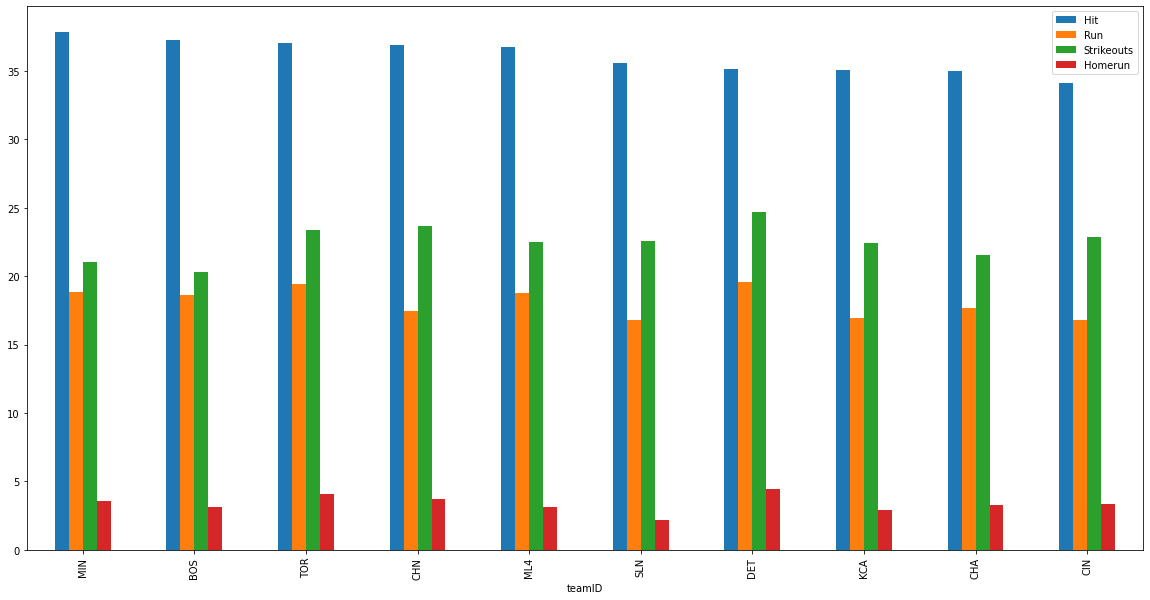

In [8]:
top_10_df.plot(kind= 'bar', figsize=(20,10))

plt.show()

# Pitching 




In [9]:
path=os.path.join("projectdata/pitching.csv")
print(path)
data_pitch = pd.read_csv("projectdata/pitching.csv")
data_pitch.head()

projectdata/pitching.csv


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [10]:
data_pitch[["playerID",
           "yearID",
           "teamID",
           "R",
           "H",
           "SO",
           "L",
           "W"]]

,playerID,yearID,teamID,R,H,SO,L,W
0,bechtge01,1871,PH1,42,43,1,2,1
1,brainas01,1871,WS3,292,361,13,15,12
2,fergubo01,1871,NY2,9,8,0,0,0
3,fishech01,1871,RC1,257,295,15,16,4
4,fleetfr01,1871,NY2,21,20,0,1,0
...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,NYN,5,10,8,1,0
47624,zeuchtj01,2019,TOR,13,22,20,2,1
47625,zimmejo02,2019,DET,89,145,82,13,1
47626,zimmeky01,2019,KCA,22,28,18,1,0


In [11]:
##wins, losses, hit, runs and strikeouts find mean
avg_hit_p = data_pitch.groupby("teamID").H.mean()
avg_run_p = data_pitch.groupby("teamID").R.mean()
avg_strikeouts_p = data_pitch.groupby("teamID").SO.mean()
avg_wins_p = data_pitch.groupby("teamID").W.mean()
avg_losses_p = data_pitch.groupby("teamID").L.mean()

pfinal_avg_df = pd.DataFrame({"Hit" : (avg_hit_p) ,
                            "Run" :(avg_run_p),
                            "Strikeouts" :(avg_strikeouts_p),
                            "Wins" : (avg_wins_p),
                            "Losses" : (avg_losses_p)})
pfinal_avg_df

,Hit,Run,Strikeouts,Wins,Losses
teamID,,,,,
ALT,58.400000,43.200000,18.600000,1.200000,3.800000
ANA,75.064103,39.250000,50.987179,4.256410,4.051282
ARI,59.353383,30.663534,50.210526,3.313910,3.385338
ATL,67.919384,33.028080,48.801630,4.015399,3.778080
BAL,73.784219,36.966989,48.090177,4.272142,4.165862
...,...,...,...,...,...
WS6,99.250000,84.500000,1.500000,1.250000,5.750000
WS7,161.000000,120.250000,58.750000,3.000000,12.750000
WS8,116.609756,79.024390,41.219512,3.902439,8.219512


In [12]:
#finding the top 10 and graphing
top_10_df = pfinal_avg_df.sort_values('Hit', ascending=False).head(10)
top_10_df

,Hit,Run,Strikeouts,Wins,Losses
teamID,,,,,
CHP,309.500000,192.500000,115.000000,18.750000,15.500000
WS5,297.000000,242.500000,5.000000,4.000000,15.500000
HR1,272.200000,162.800000,38.200000,14.000000,13.000000
BRP,266.800000,178.600000,75.400000,15.200000,11.200000
NY2,265.000000,169.272727,29.636364,13.727273,11.090909
FW1,261.000000,243.000000,17.000000,6.000000,11.000000
PHP,258.400000,171.000000,72.200000,13.600000,12.600000
SR1,258.333333,154.000000,44.000000,7.333333,16.000000
LS1,244.400000,126.400000,53.200000,13.000000,12.200000


<AxesSubplot:xlabel='teamID'>

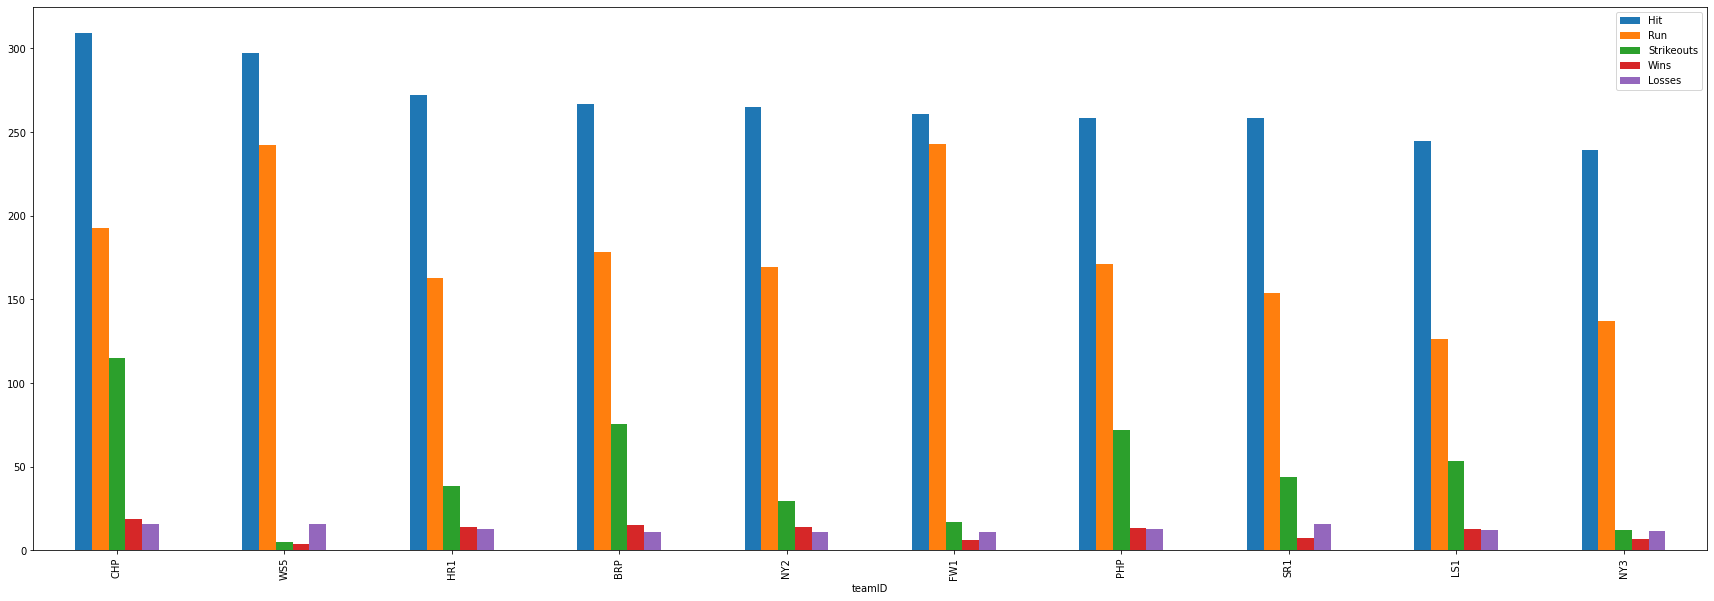

In [13]:
top_10_df.plot(kind= 'bar', figsize=(30,10))

<AxesSubplot:xlabel='teamID', ylabel='scores'>

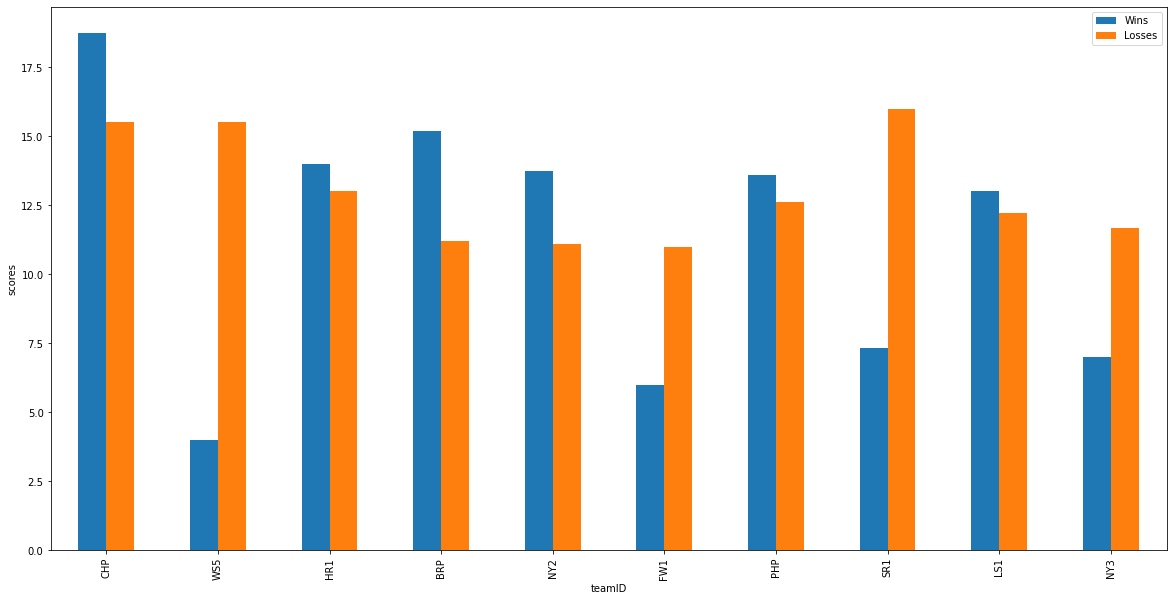

In [14]:
#graph for wins and losses for top 10 only 
top_10_df.plot(y=["Wins","Losses"],ylabel="scores",kind= "bar", figsize=(20,10))

In [15]:
#linear regression

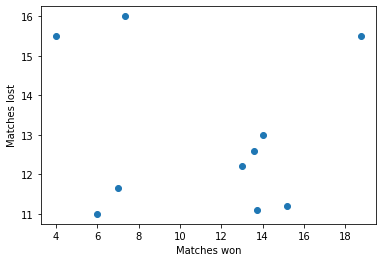

In [16]:
#wins vs loss scatter plot
x_values = top_10_df['Wins']
y_values = top_10_df['Losses']
plt.scatter(x_values,y_values)
plt.xlabel("Matches won")
plt.ylabel("Matches lost")
plt.show()

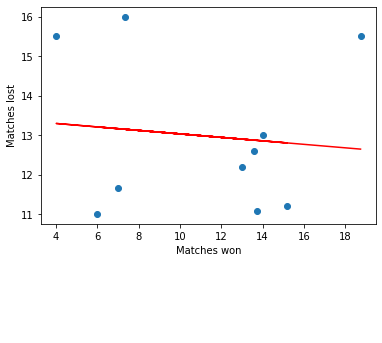

In [18]:
#adding linear regression equation and line to plot
x_values = top_10_df['Wins']
y_values = top_10_df['Losses']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,8),fontsize=15,color="red")
plt.xlabel("Matches won")
plt.ylabel("Matches lost")
plt.show()